In [1]:
%matplotlib inline
import numpy as np
import healpy as hp
import matplotlib.pylab as plt
from rubin_sim.scheduler.utils import Sky_area_generator

In [2]:
sag = Sky_area_generator()

In [3]:
result, labels = sag.return_maps()

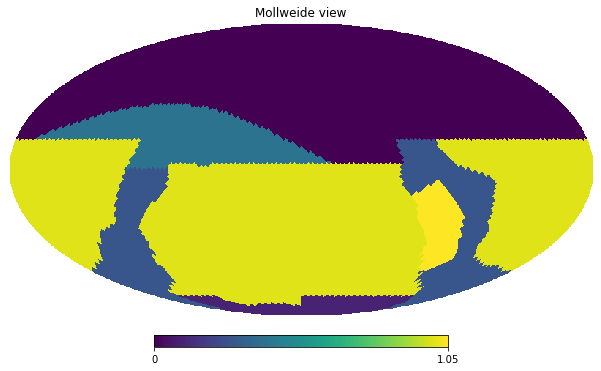

In [4]:
hp.mollview(result['r'])

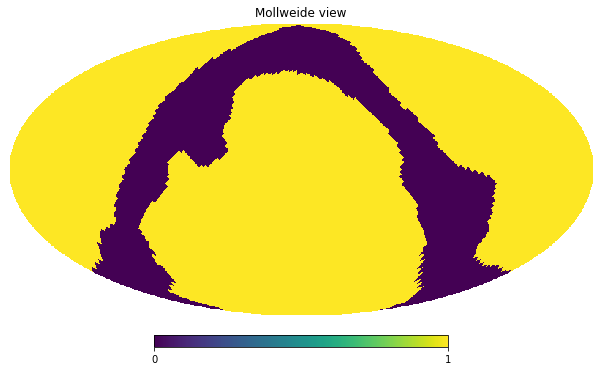

In [5]:
hp.mollview(sag.low_dust)

In [6]:
np.unique(labels)

array(['', 'LMC_SMC', 'bulge', 'dusty_plane', 'lowdust', 'nes', 'scp'],
      dtype='<U20')

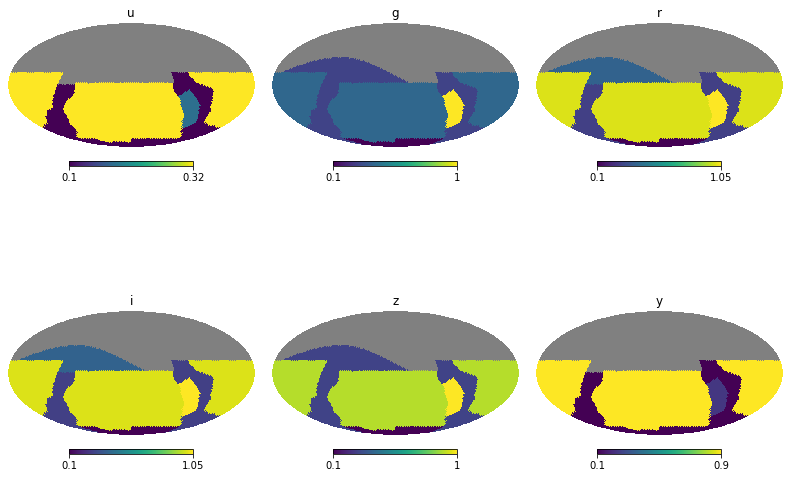

In [7]:
for key in result.dtype.names:
    result[key][np.where(result[key] == 0)[0]] = hp.UNSEEN
    

fig = plt.figure(figsize=(11,8))
hp.mollview(result['u'], title='u', sub=(2,3,1))
hp.mollview(result['g'], title='g', sub=(2,3,2))
hp.mollview(result['r'], title='r', sub=(2,3,3))
hp.mollview(result['i'], title='i', sub=(2,3,4))
hp.mollview(result['z'], title='z', sub=(2,3,5))
hp.mollview(result['y'], title='y', sub=(2,3,6))
#plt.tight_layout()


In [10]:
counts, counts_sum, labels = sag.estimate_visits(1.8e6)


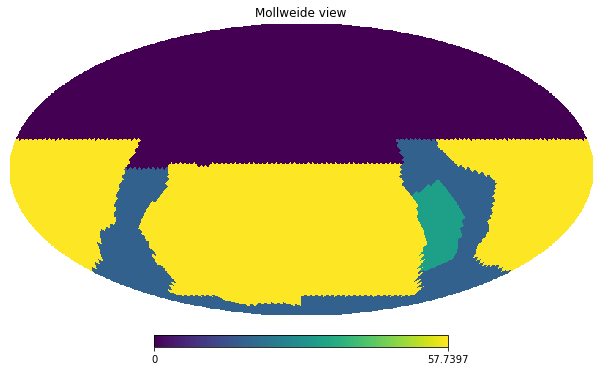

In [11]:
hp.mollview(counts['u'])

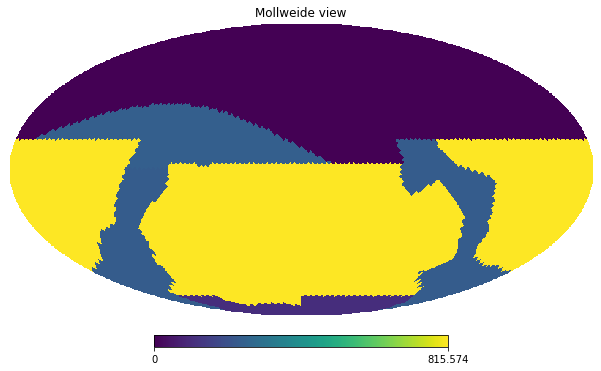

In [12]:
hp.mollview(counts_sum)

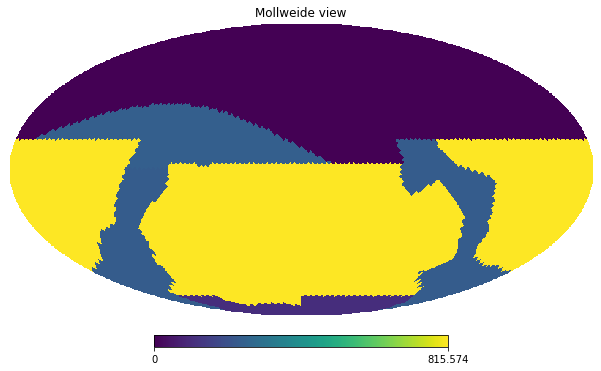

In [13]:
from numpy.lib import recfunctions as rfn

ack = rfn.structured_to_unstructured(counts).sum(axis=1)
hp.mollview(ack)

In [14]:
sag.estimate_visits_per_label(1.9e6)

{'': 0.0,
 'LMC_SMC': 41545.70506413913,
 'bulge': 82006.41023169176,
 'dusty_plane': 109459.10558933929,
 'lowdust': 1571812.5082599302,
 'nes': 84785.84827248707,
 'scp': 10390.422582412637}

In [8]:
osa = old_Sky_area_generator(nside=32)
osa.set_maps()
final_tot, footprints_hp = osa.return_maps()
# Set the wfd, aka rolling, pixels
wfd_footprint = osa.maps['dustfree']
wfd_indx = np.where(wfd_footprint > 0)[0]

normval = footprints_hp['r'][wfd_indx].min()
for key in footprints_hp:
    footprints_hp[key] = footprints_hp[key]/normval

NameError: name 'old_Sky_area_generator' is not defined

In [ ]:
for key in 'ugrizy':
    
    label = ' '
    for val in np.unique(footprints_hp[key]):
        label += ' %0.2f ' % val
    hp.mollview(footprints_hp[key], unit=label, title=key)

In [ ]:
for key in 'ugrizy':
    
    label = ' '
    for val in np.unique(result[key]):
        label += ' %0.2f ' % val
    hp.mollview(result[key], unit=label, title=key)

In [ ]:
for key in footprints_hp:
    print(key, footprints_hp[key][6818])

In [ ]:
indx = np.where(footprints_hp['r'] == 1)[0].min()
for key in footprints_hp:
    print(key, footprints_hp[key][indx])

In [ ]:
np.unique(footprints_hp['r'])

In [ ]:
indx = np.where((footprints_hp['r'] > 0.2) & (footprints_hp['r'] < 0.4))[0].min()
for key in footprints_hp:
    print(key, footprints_hp[key][indx])

In [ ]:
hp.mollview(footprints_hp['z'])

In [ ]:
np.unique(footprints_hp['z'])

In [ ]:
hp.mollview(osa.bulge)

In [ ]:
hp.mollview(osa.maps['gal'])

In [ ]:
for filtername in 'ugrizy':
    hp.mollview(footprints_hp[filtername] - result[filtername], title=filtername)